In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [32]:
df = data = pd.read_csv("CleanData/2017/data.csv")
df.sample(5)

# Afficher les prédictions
count = df['Tendance'].value_counts()

print(count)

Tendance
droite    34814
gauche    34814
Name: count, dtype: int64


In [33]:

loire = df.loc[df['Code du département'] == '93']


loire.to_csv("./CleanData/loire.csv", index=False);

df = data.drop(data[data['Code du département'] == '93'].index)

display(df[df['Code du département'] == '23'])

df = df.drop([
'codgeo',
'Code du département',
'Population Total',
'Nombre de chômeurs de 15 à 64 ans',
'Population Active'], axis=1)


,codgeo,Taux Voitures Menage,Tendance,Voix,Code du département,Revenus,Nombre de chômeurs de 15 à 64 ans,Population Active,Taux Chomage,Population Total,Taux scolarisées,Taux Creation Entreprise
1148,23096,0.272097,droite,2196,23,20710,989.642035,5977.623588,0.165558,13764,0.379652,9.5
1149,23096,0.272097,gauche,2283,23,20710,989.642035,5977.623588,0.165558,13764,0.379652,9.5
3154,23176,0.255552,droite,1076,23,19850,342.650169,1988.093296,0.172351,5448,0.481978,7.3
3155,23176,0.255552,gauche,1008,23,19850,342.650169,1988.093296,0.172351,5448,0.481978,7.3
4888,23008,0.205835,droite,725,23,18620,269.739160,1359.775394,0.198370,3551,0.406526,5.6
...,...,...,...,...,...,...,...,...,...,...,...,...
68795,23055,0.647059,gauche,8,23,22461,1.000000,11.000000,0.090909,32,1.000000,0.0
69164,23019,0.642857,droite,5,23,22461,1.000000,13.000000,0.076923,25,0.000000,0.0
69165,23019,0.642857,gauche,17,23,22461,1.000000,13.000000,0.076923,25,0.000000,0.0
69226,23034,0.230769,droite,11,23,22461,2.000000,13.000000,0.153846,27,0.000000,0.0


In [34]:
dummy = pd.get_dummies (df ['Tendance'])
df = pd.concat( [df, dummy ], axis = 1)
df = df.drop( ['Tendance'], axis = 1)

## Visualisation

<Axes: title={'center': 'Correlation matrix heatmap'}>

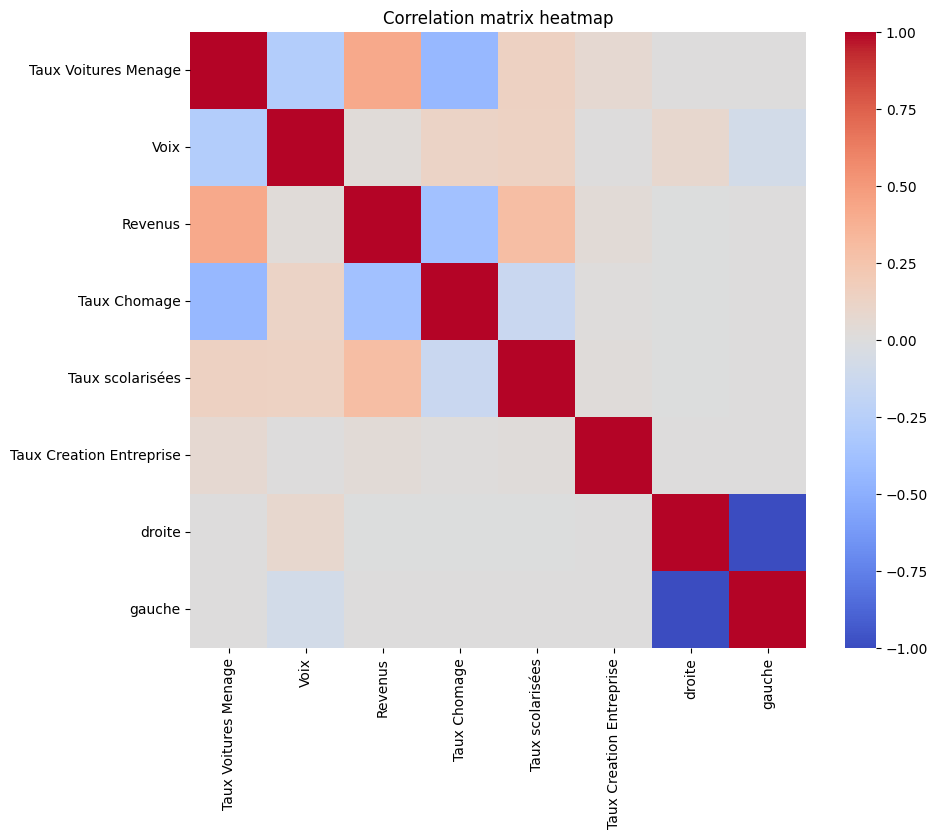

In [35]:
import seaborn as sns
fig, ax = plt.subplots(figsize = (10, 8))
plt.title('Correlation matrix heatmap')
correlation = df.corr()
sns.heatmap(
data = correlation,
square = True,
cmap = 'coolwarm',
ax = ax
)

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

X = df.drop(["gauche", "droite"], axis=1)
Y = df[["gauche", "droite"]]


x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Convertir Y en un tableau 1D
y_train = y_train.idxmax(axis=1)
y_test = y_test.idxmax(axis=1)

display(x_test)
display(y_train)
display(y_test)

,Taux Voitures Menage,Voix,Revenus,Taux Chomage,Taux scolarisées,Taux Creation Entreprise
24503,0.337580,76,19330,0.208005,0.381347,4.9
57914,0.444444,68,21220,0.144928,0.200000,25.0
53860,0.569620,72,21710,0.130081,0.250000,8.3
56537,0.588235,10,23760,0.068182,0.235294,0.0
9802,0.423034,525,21070,0.137461,0.254721,8.3
...,...,...,...,...,...,...
12328,0.512057,571,23510,0.127319,0.302023,10.3
10185,0.553510,285,26810,0.071429,0.507246,14.6
43496,0.507812,165,20620,0.123019,0.302200,7.1
53795,0.506329,36,22510,0.126437,0.125000,0.0


8803     gauche
26853    gauche
50459    gauche
20145    gauche
55508    droite
          ...  
37274    droite
6345     gauche
54966    droite
922      droite
15875    gauche
Length: 55638, dtype: object

24503    gauche
57914    droite
53860    droite
56537    gauche
9802     droite
          ...  
12328    droite
10185    gauche
43496    droite
53795    gauche
69323    gauche
Length: 13910, dtype: object

In [37]:
feature_names = df.drop(["droite", "gauche"], axis=1).columns.tolist()
feature_names

['Taux Voitures Menage',
 'Voix',
 'Revenus',
 'Taux Chomage',
 'Taux scolarisées',
 'Taux Creation Entreprise']

In [38]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

print(df.isna().sum())

tree_dc = DecisionTreeClassifier(max_depth=5, random_state=42);
tree_dc.fit(x_train, y_train);

y_pred = tree_dc.predict(x_test);
print(accuracy_score(y_test, y_pred))

Taux Voitures Menage        0
Voix                        0
Revenus                     0
Taux Chomage                0
Taux scolarisées            0
Taux Creation Entreprise    0
droite                      0
gauche                      0
dtype: int64
0.682099209202013


In [39]:
from sklearn.ensemble import RandomForestClassifier


rd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, max_depth=2, random_state=42)
rd_clf.fit(x_train, y_train);

In [40]:
print("Ordre d'importance des features")
for name, score in zip(feature_names, rd_clf.feature_importances_):
    print('%s: %i%%' %(name, int(score*100)))

Ordre d'importance des features
Taux Voitures Menage: 10%
Voix: 62%
Revenus: 8%
Taux Chomage: 6%
Taux scolarisées: 6%
Taux Creation Entreprise: 6%


In [41]:

from sklearn.ensemble import AdaBoostClassifier


ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=4), n_estimators=200, learning_rate=0.2, random_state=42)

ada_clf.fit(x_train, y_train)

y_pred_ada = ada_clf.predict(x_test)
print('score Adaboost :' , accuracy_score(y_test, y_pred_ada))

score Adaboost : 0.7565061107117181


In [42]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 1, 2, 6, 8],
    'n_estimators': [50, 100, 150, 200, 500, 1000, 1500],
    'learning_rate': [0.1, 0.2, 0.4],
}
# Créer un objet GradientBoostingClassifier avec des valeurs arbitraires pour les hyperparamètres
clf = GradientBoostingClassifier(max_depth=2, n_estimators=100, learning_rate=0.1, n_iter_no_change=5, tol=0.0001)

# Effectuer une recherche de grille
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=2, error_score='raise')
grid_search.fit(x_train, y_train)

# Afficher les meilleures valeurs d'hyperparamètres
print(grid_search.best_params_)

# Entraîner un GradientBoostingClassifier avec les meilleures valeurs d'hyperparamètres
best_clf = GradientBoostingClassifier(**grid_search.best_params_)
best_clf.fit(x_train, y_train)

accuracy = best_clf.score(x_test, y_test)
print(f"Accuracy : {accuracy:.2f}")

KeyboardInterrupt: 

In [44]:

x_new = pd.read_csv("./CleanData/loire.csv")

tendances = x_new['Tendance']
communes = x_new['codgeo']

x_new = x_new.drop([
'codgeo',
'Code du département',
'Tendance',
'Population Total',
'Nombre de chômeurs de 15 à 64 ans',
'Population Active'], axis=1)


# Effectuer des prédictions sur les nouvelles données
predictions = ada_clf.predict(x_new)

tests = pd.concat([x_new, pd.Series(predictions)], axis=1)
tests = pd.concat([tests, tendances], axis=1)

# Afficher les prédictions
unique_values, counts = np.unique(predictions, return_counts=True)

good = 0
total = 0

for i, (predicted_class, tendance, com) in enumerate(zip(predictions, tendances, communes)):
    print(f"Donnée {i+1}: Commune : {com} Tendance = {tendance}, Classe prédite = {predicted_class}")


    if predicted_class == tendance:
        good = good + 1

    total = total + 1

print("Pourcentage ", good/total)

print(unique_values)
print(counts)

Donnée 1: Commune : 93048 Tendance = droite, Classe prédite = droite
Donnée 2: Commune : 93048 Tendance = gauche, Classe prédite = gauche
Donnée 3: Commune : 93066 Tendance = droite, Classe prédite = gauche
Donnée 4: Commune : 93066 Tendance = gauche, Classe prédite = droite
Donnée 5: Commune : 93001 Tendance = droite, Classe prédite = gauche
Donnée 6: Commune : 93001 Tendance = gauche, Classe prédite = gauche
Donnée 7: Commune : 93005 Tendance = droite, Classe prédite = gauche
Donnée 8: Commune : 93005 Tendance = gauche, Classe prédite = gauche
Donnée 9: Commune : 93051 Tendance = droite, Classe prédite = gauche
Donnée 10: Commune : 93051 Tendance = gauche, Classe prédite = gauche
Donnée 11: Commune : 93029 Tendance = droite, Classe prédite = gauche
Donnée 12: Commune : 93029 Tendance = gauche, Classe prédite = gauche
Donnée 13: Commune : 93055 Tendance = droite, Classe prédite = droite
Donnée 14: Commune : 93055 Tendance = gauche, Classe prédite = droite
Donnée 15: Commune : 93070 Te